In [116]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")

In [165]:
from Agent import Agent
from Environment import Rectangle

In [185]:
boxsize=(2.2, 2.2)
origo=(0,0)
soft_boundary=0.001

In [186]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
avoid_walls = env.avoid_walls

In [187]:
ag = Agent(np.pi, 0.02, np.array([[0.5,0.5]]))

for i in range(1000):
    ag.step(avoid_walls)

print(ag.speeds)
print(ag.hds)
print(ag.velocities)
print(ag.positions.shape)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

"\n# hard coded walls\nplt.plot((0,0),(0,2.2),'orange')\nplt.plot((0,2.2),(0,0),'orange')\nplt.plot((2.2,2.2),(0,2.2),'orange')\nplt.plot((2.2,0),(2.2,2.2),'orange')\n"

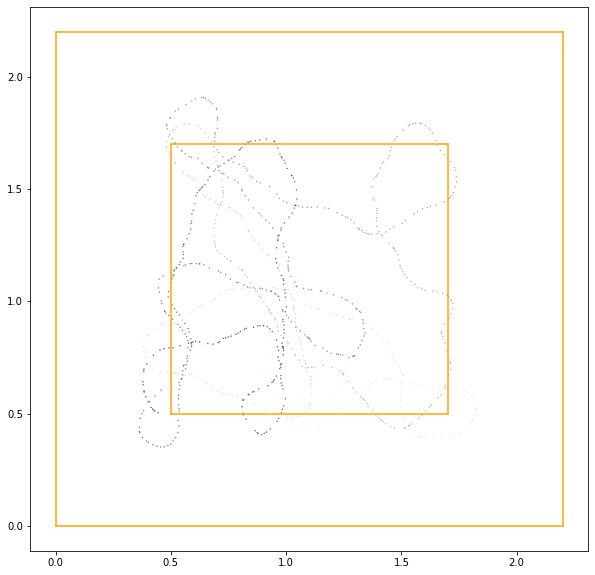

In [184]:
n=ag.positions.shape[0]

fig,axs=plt.subplots(figsize=(10,10))
c=np.zeros((n,4))
c[:,-1] = 1
c[:,:-1] = np.linspace(0,1,n)[:,None]
axs.scatter(*ag.positions.T,s=0.1,c=c)#[(0,0,0,1)]*100001)

# walls as an easily plottable matrix
W1 = np.array([env.walls['w1']['bias'],sum(env.walls['w1'].values())]).T
W2 = np.array([env.walls['w2']['bias'],sum(env.walls['w2'].values())]).T
W3 = np.array([env.walls['w3']['bias'],sum(env.walls['w3'].values())]).T
W4 = np.array([env.walls['w4']['bias'],sum(env.walls['w4'].values())]).T

# walls plot
plt.plot(*W1,'orange')
plt.plot(*W2,'orange')
plt.plot(*W3,'orange')
plt.plot(*W4,'orange')

# soft boundary plot
plt.plot(*np.abs(W1 - soft_boundary),'orange')
plt.plot(*np.abs(W2 - soft_boundary),'orange')
plt.plot(*np.abs(W3 - soft_boundary),'orange')
plt.plot(*np.abs(W4 - soft_boundary),'orange')


"""
# hard coded walls
plt.plot((0,0),(0,2.2),'orange')
plt.plot((0,2.2),(0,0),'orange')
plt.plot((2.2,2.2),(0,2.2),'orange')
plt.plot((2.2,0),(2.2,2.2),'orange')
"""

# Testing whether numpy.append or list.append is faster

In [93]:
from ctimeit import ctimeit

In [100]:
@ctimeit
def array_cat():
    a = np.zeros(0)
    for i in range(100000):
        a = np.append(a,i)
    
    return a

array_cat()

File "<ipython-input-100-d38cc1da07f1>", line 9, function: array_cat() used <2.150149049999527> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

In [103]:
@ctimeit
def list_cat():
    a = []
    for i in range(100000):
        a.append(i)
    
    return i
array_cat()

File "<ipython-input-103-d0af6f9751c8>", line 8, function: array_cat() used <2.2002655910000612> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

# Conclusion: NO DIFFERENCE